# **HYPOTHYROIDISM DIAGNOSIS**

## **Objective**
1. To create an algorithm that diagnoses patients with hypothyroid-like symptoms.
2. To create a classification model with 99% accuracy

## **Context**

## **Experimental Design**

## **Loading Libraries**

In [198]:
# Reading libraries
import pandas as pd
import numpy as np
from datetime import date, time
# Ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Statististical libraries
# Machine learning libraries
# Metrics

## **Loading and previewing the datasets**

In [199]:
hypothyroiddf= pd.read_csv('hypothyroid.csv')

In [200]:
hypothyroiddf.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [201]:
hypothyroiddf.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [202]:
hypothyroiddf.shape
#The dataset has 3163 records and 26 features

(3163, 26)

In [203]:
hypothyroiddf.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [204]:
hypothyroiddf.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## **Data Cleaning**

### Duplicates

In [205]:
# Checking and dropping duplicated records
def duplicates(data):
  dup =data.duplicated().sum()
  if dup > 0:
    data.drop_duplicates(inplace= True)
  return data.duplicated().sum()

In [206]:
duplicates(hypothyroiddf)
#Duplicated records have been dealth with

0

### Missing Values

In [207]:
#Checking for missing values
def missing_values(data):
  data.iloc[:] =data.iloc[:].replace('?',np.NaN)
  data.iloc[:] =data.iloc[:].replace('!',np.NaN)
  data.iloc[:] =data.iloc[:].replace(' ',np.NaN)
  miss= data.isnull().sum()/len(data) *100
  missdf= pd.DataFrame(miss)
  return missdf.transpose() 

In [208]:
missing_values(hypothyroiddf)
# The TBG column has 91.9% missing values. 
# Therefore the TBG column will be dropped.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0.0,14.19313,2.365522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,22.034997,0.0,7.777058,0.0,7.744653,0.0,7.712249,0.0,91.866494


In [209]:
# Dropping the TBG column
hypothyroiddf.drop('TBG', axis=1, inplace=True)

In [210]:
# Correcting data types from object dtype to float dtype
columns= ['age','T3','TT4','T4U','FTI','TSH']
for x in columns:
  hypothyroiddf[x]=hypothyroiddf[x].astype('float')

In [211]:
#Finding the means of the 'age','T3','TT4','T4U','TFI' 
# columns where status is negative or positive.
col= ['age','T3','TT4','T4U','FTI','TSH']
for m in col:
  means=hypothyroiddf.groupby('status')[m].mean()
  print(means)

status
hypothyroid    53.849206
negative       50.975813
Name: age, dtype: float64
status
hypothyroid    1.126562
negative       1.979017
Name: T3, dtype: float64
status
hypothyroid     35.11773
negative       112.54281
Name: TT4, dtype: float64
status
hypothyroid    1.061915
negative       0.973163
Name: T4U, dtype: float64
status
hypothyroid     33.240426
negative       119.773181
Name: FTI, dtype: float64
status
hypothyroid    65.653571
negative        2.445933
Name: TSH, dtype: float64


In [212]:
# Filling the missing values of the numeric columns listed below with their respective 
# means given the status (nagetive or positive for hypothyroid) of the patient.
col= ['age','T3','TT4','T4U','TSH','FTI']

if hypothyroiddf['status'].any == 'negative':
  for m in col:
    hypothyroiddf[m]=hypothyroiddf[hypothyroiddf['status'] == 'negative'].fillna(hypothyroiddf[m].mean())
else:
  for m in col:
    hypothyroiddf[m]=hypothyroiddf[m].fillna(hypothyroiddf[m].mean())
  

In [213]:
# Verifying the number of missing values remaining
missing_values(hypothyroiddf)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0.0,0.0,2.365522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
#Checking the mode of the sex column.
hypothyroiddf['sex'].mode()
#The majority of the respondents were female

0    F
dtype: object

In [215]:
#Filling the missing values on the sex column with the mode of the 'sex' column
hypothyroiddf['sex'].fillna('F',inplace=True)

In [216]:
# Verifying that all missing vales have be dealt with.
missing_values(hypothyroiddf)
# All columns have 0% missing values.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outliers

In [223]:
def outliers(data):
  plt.figure(figsize=(15,15))
  data.boxplot()
  plt.savefig('outliers.png',format='png')
  plt.show()
  return

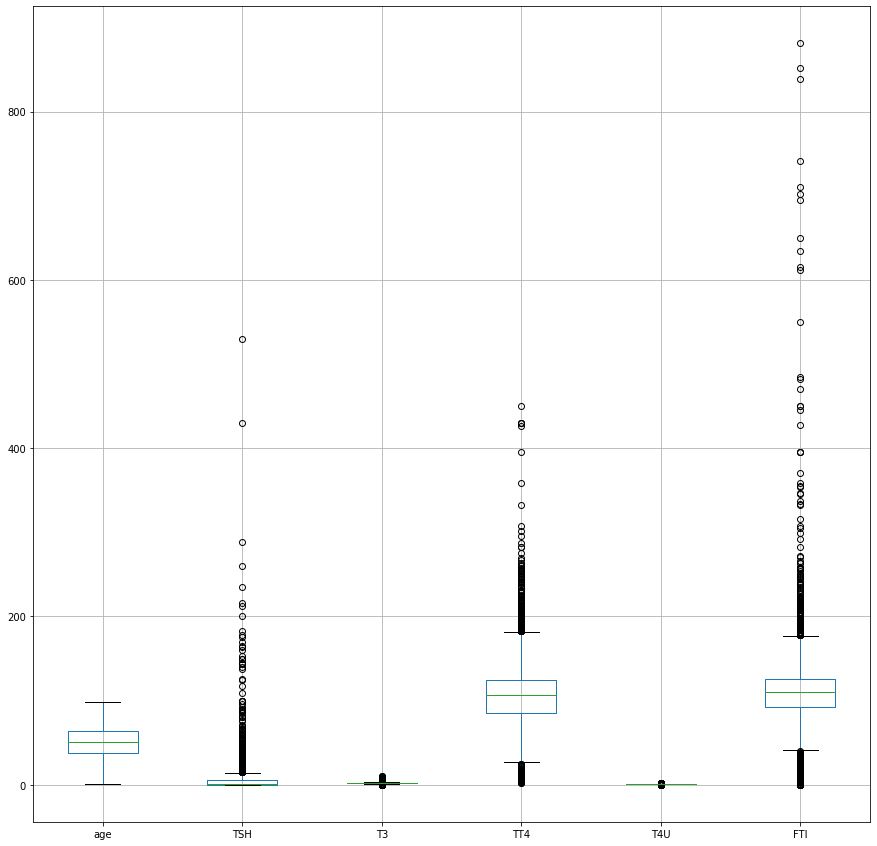

In [224]:
outliers(hypothyroiddf)